In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd
from ripser import Rips



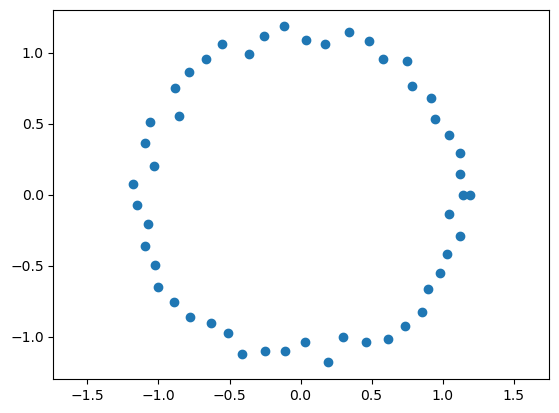

In [16]:

# Generate 50 random points on a 2D circle with radius 1
theta = np.linspace(0, 2*np.pi, 50)
r = (np.sqrt(np.random.uniform(0, 1, 50)) + 5) / 5
x = r * np.cos(theta)
y = r * np.sin(theta)

data = np.column_stack((x,y))

# Plot the points
plt.scatter(data[:,0], data[:,1])
plt.axis('equal')
plt.show()

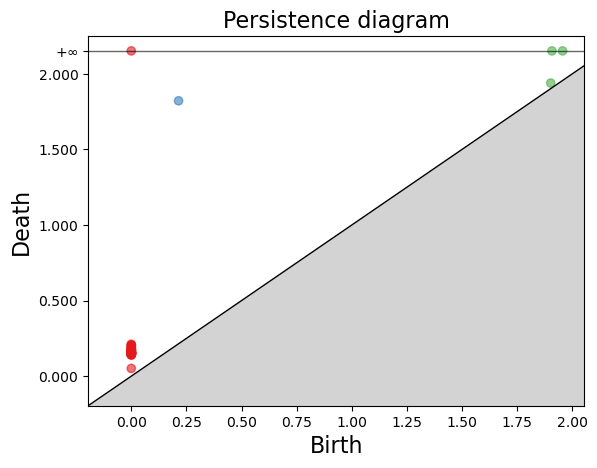

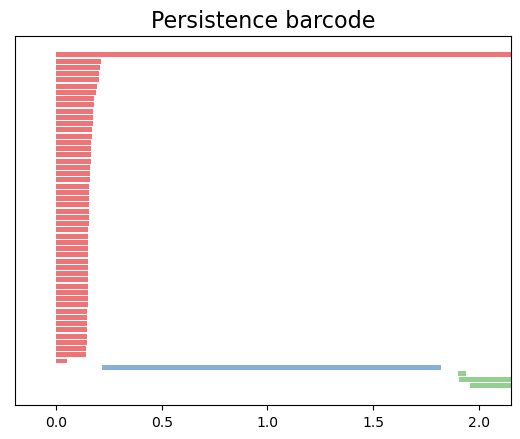

In [17]:
rips_complex = gd.RipsComplex(points=data, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

gd.plot_persistence_diagram(persistence=persistence)
gd.plot_persistence_barcode(persistence=persistence)

In [18]:
count = 0
rips_complex = gd.RipsComplex(points=data, max_edge_length=20)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

# gd.plot_persistence_diagram(persistence=persistence)
pairs = simplex_tree.persistence_pairs()
filtration = simplex_tree.get_filtration()


In [19]:

for birth_value, death_value in [i[1] for i in persistence]:
    filtration = simplex_tree.get_filtration()
    tolerance = 1e-6
    birth_simplices = []
    death_simplices = []

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print(simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf):
            death_simplices.append(simplex)
    # print(birth_simplices)

    involved_points = set()

    for birth_simplex in birth_simplices:
        for death_simplex in death_simplices:
            if set(birth_simplex).issubset(death_simplex):
                involved_points.update(birth_simplex)
                involved_points.update(death_simplex)

    if len(involved_points) >= 0 : print(count, birth_value, death_value, involved_points) 
    count += 1
    
        

0 1.907971289503705 2.0177499759162982 {32, 48, 20, 15}
1 1.9561057725934914 2.019237595857151 {8, 26, 12, 44}
2 1.902181807829838 1.9390542783516622 {20, 39, 6, 23}
3 0.21446913388101402 1.8217673778574914 set()
4 0.0 inf {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
5 0.0 0.2110591187364642 {20, 21}
6 0.0 0.20664276535117945 {38, 39}
7 0.0 0.20243040232521342 {16, 15}
8 0.0 0.20031189698312116 {19, 20}
9 0.0 0.19333375117598176 {24, 23}
10 0.0 0.18714170446697687 {10, 11}
11 0.0 0.1794855371065329 {6, 7}
12 0.0 0.17759009201181764 {33, 34}
13 0.0 0.17582138053343924 {48, 47}
14 0.0 0.17564587274650664 {12, 13}
15 0.0 0.17486023799895176 {22, 23}
16 0.0 0.16926199070163553 {8, 7}
17 0.0 0.16909964734826405 {14, 15}
18 0.0 0.1655641395962872 {0, 48}
19 0.0 0.1651530334038051 {40, 39}
20 0.0 0.16382406777179914 {34, 35}
21 0.0 0.163006877396709

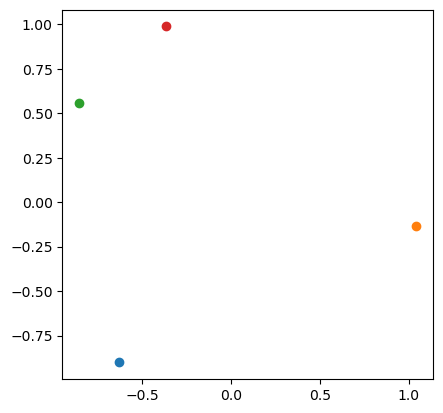

In [20]:
concern_points = list({32, 48, 20, 15})
fig, ax = plt.subplots()
# for i in range(len(centers)):
#     ax.scatter(x[:, i], y[:, i])
for idx, p in enumerate([data[i] for i in concern_points]):
    ax.scatter(p[0], p[1])
ax.set_aspect('equal')
plt.show()

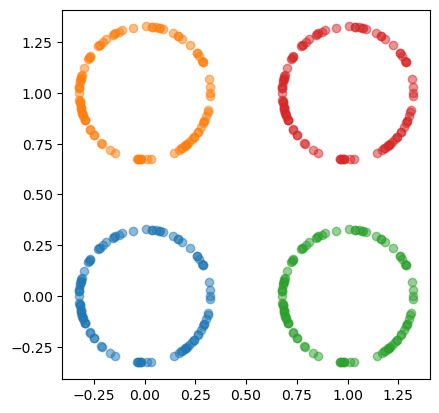

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of points and radius range
n_points = 100
min_radius = 0.4
max_radius = 0.6

# Define the centers of the circles
centers = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])

# Generate random radii and angles for each point
# radii = np.random.uniform(min_radius, max_radius, size=n_points)
angles = np.random.uniform(0, 2*np.pi, size=n_points)

# Generate the x and y coordinates for each point

x = (np.random.uniform(0, 1) / 20 + 0.3) * np.cos(angles)[:, np.newaxis] + centers[:, 0]
y = (np.random.uniform(0, 1) / 20 + 0.3) * np.sin(angles)[:, np.newaxis] + centers[:, 1]

# Plot the circles
fig, ax = plt.subplots()
for i in range(len(centers)):
    ax.scatter(x[:, i], y[:, i], alpha=0.5)
ax.set_aspect('equal')
plt.show()
